In [1]:
import os
for dirname,_,filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname,filename))
 

./loanPrediction.ipynb
./.gitignore
./data/test.csv
./data/train.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context='notebook',style='darkgrid',palette='colorblind',font='sans-serif', font_scale=1, rc=None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

In [6]:
print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (614, 13)
test shape: (367, 12)


In [11]:
all_data=pd.concat([train,test],axis=0,ignore_index=True)
print(len(all_data))

981


In [8]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [12]:
all_data.isnull().sum()/all_data.shape[0]

Loan_ID              0.000000
Gender               0.024465
Married              0.003058
Dependents           0.025484
Education            0.000000
Self_Employed        0.056065
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.027523
Loan_Amount_Term     0.020387
Credit_History       0.080530
Property_Area        0.000000
Loan_Status          0.374108
dtype: float64

<AxesSubplot:ylabel='None'>

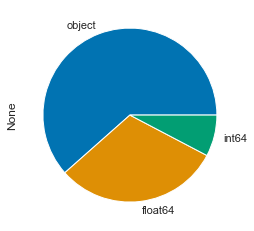

In [13]:
train.dtypes.value_counts().plot.pie()

In [16]:
train.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


<AxesSubplot:ylabel='Loan_Status'>

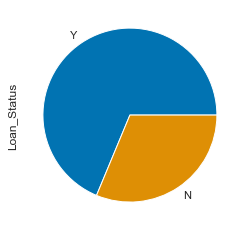

In [20]:
train['Loan_Status'].value_counts().plot.pie()

In [21]:
# 连续属性采用直方图看分布与关联
# 离散属性采用条形图
def fea_plot(feature):
    sns.histplot(data=train,x=feature,hue='Loan_Status',multiple='dodge').set_title(f'{feature} vs Loan_Status')

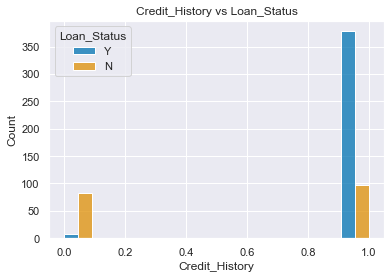

In [39]:
fea_plot('Credit_History')

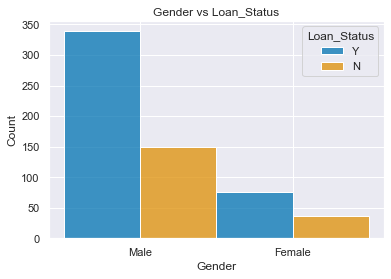

In [22]:
fea_plot('Gender')

In [36]:

def facet_grid(feature):
    grid=sns.FacetGrid(data=train,col='Loan_Status',size=3,aspect=1.2)
    grid.map(sns.countplot,feature)

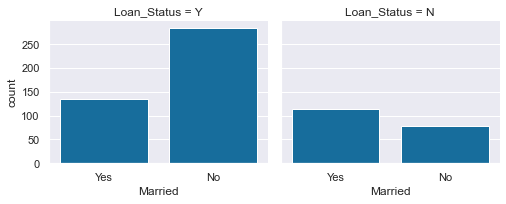

In [38]:
facet_grid('Married')

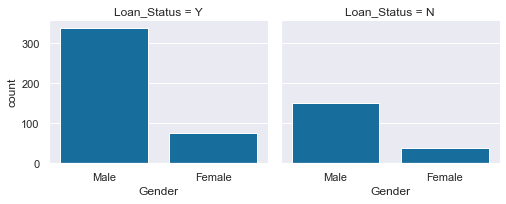

In [37]:
facet_grid('Gender')

<AxesSubplot:xlabel='Married', ylabel='count'>

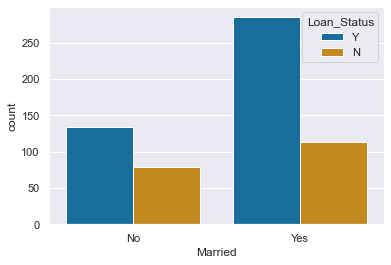

In [41]:
sns.countplot(data=train,x='Married',hue='Loan_Status')
# good feature

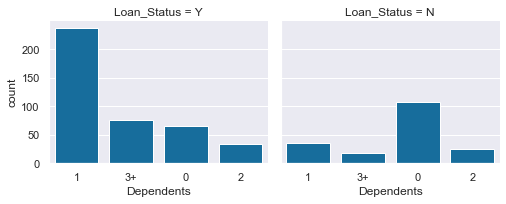

In [42]:
facet_grid('Dependents')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

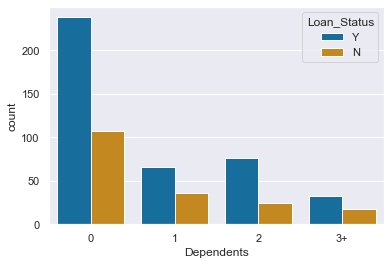

In [44]:
sns.countplot(data=train,hue='Loan_Status',x='Dependents')
#  first if Dependents = 0 , we got higher chance to get a loan ((very hight chance))
# good feature

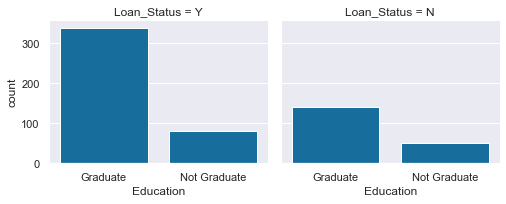

In [45]:
facet_grid('Education')

<AxesSubplot:xlabel='Education', ylabel='count'>

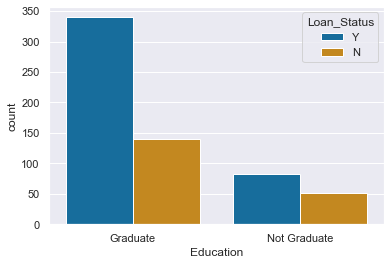

In [48]:
sns.countplot(data=train,x='Education',hue='Loan_Status')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

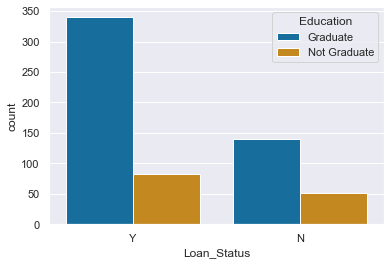

In [49]:
sns.countplot(data=train,hue='Education',x='Loan_Status')

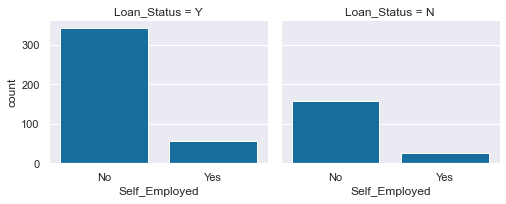

In [46]:
facet_grid('Self_Employed')

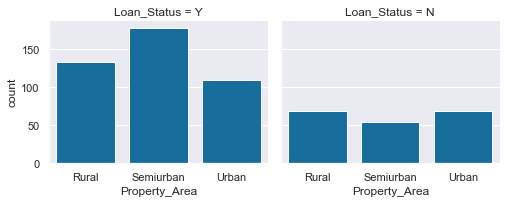

In [47]:
facet_grid('Property_Area')

In [50]:
train.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


In [51]:
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
cat_data=[]
num_data=[]

for i,c in enumerate(train.dtypes):
    if c==object:
        cat_data.append(train.iloc[:,i])
    else:
        num_data.append(train.iloc[:,i])

In [53]:
len(cat_data)

8

In [56]:
cat_df=pd.DataFrame(cat_data).T
num_df=pd.DataFrame(num_data).T

In [57]:
cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [60]:
cat_df.isnull().sum()

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [59]:
#filling missing data----- category 
cat_df = cat_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_df.isnull().sum().any()


False

In [61]:
# filling missing data -------numerical
num_df.fillna(method='bfill',inplace=True)
num_df.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [62]:
# 对类别属性进行编码
# 采用labelencode
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

target=cat_df['Loan_Status']
cat_df.drop('Loan_Status',axis=1,inplace=True)
target.map({'Y':0,'N':1}) 

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [63]:
for i in cat_df:
    cat_df[i]=le.fit_transform(cat_df[i])

In [64]:
cat_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2


In [65]:
df=pd.concat([cat_df,num_df,target],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,Y
1,1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,N
2,2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,Y
3,3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,Y
4,4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,Y


In [79]:
target=target.map({'Y':0,'N':1})

In [80]:
target

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Loan_Status, Length: 614, dtype: int64

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit
x=pd.concat([cat_df,num_df],axis=1)
y=target
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(x,y):
    x_train,x_test=x.iloc[train],x.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test] 
# print('X_train shape', x_train.shape)
# print('y_train shape', y_train.shape)
# print('X_test shape', x_test.shape)
# print('y_test shape', y_test.shape)

# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))



ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [94]:
print(y_train.value_counts().values/len(y_train))

[0.68635438 0.31364562]


In [97]:
# almost same ratio
print('\nratio of target in y_train :',y_train.value_counts().values/len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',df['Loan_Status'].value_counts().values/ len(df))


ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


In [86]:
# using four models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'svc':SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
    
}


In [99]:
# 选择损失函数
# 选择相同数据的训练结果的模型评价指数
# 选择交叉验证的方法
from sklearn.metrics import precision_score,f1_score,recall_score,log_loss,accuracy_score
def loss(y_true,y_pred,retu=False):
    pre = precision_score(y_true,y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))


In [100]:
def train_eval_model(models,x,y):
    for name,model in models.items():
        print(name,":")
        model.fit(x,y)
        loss(y,model.predict(x))
        print('-'*30)

In [101]:
train_eval_model(models,x,y)

LogisticRegression :
  pre: 0.856
  rec: 0.432
  f1: 0.574
  loss: 6.919
  acc: 0.800
------------------------------
KNeighborsClassifier :
  pre: 0.660
  rec: 0.344
  f1: 0.452
  loss: 9.000
  acc: 0.739
------------------------------
svc :
  pre: 1.000
  rec: 0.016
  f1: 0.031
  loss: 10.632
  acc: 0.692
------------------------------
DecisionTreeClassifier :
  pre: 0.866
  rec: 0.438
  f1: 0.581
  loss: 6.807
  acc: 0.803
------------------------------


In [102]:
def train_eval_model(models,x,y):
    for name,model in models.items():
        print(name,":")
        model.fit(x,y)
        loss(y,model.predict(x))
        print('-'*30)
        
# train_eval_cross
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,random_state=42,shuffle=True)

def train_eval_cross(models,x,y,folds):
    x=pd.DataFrame(x)
    y=pd.DataFrame(y)
    idx = [' pre', ' rec', ' f1', ' loss', ' acc']
    for name, model in models.items():
        ls = []
        print(name,':')
        for train,test in folds.split(x,y):
            model.fit(x.iloc[train],y.iloc[train])
            y_pred=model.predict(x.iloc[test])
            ls.append(loss(y.iloc[test], y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0])  #[0] because we don't want to show the name of the column
        print('-'*30)

In [103]:
train_eval_cross(models,x,y,skf)

LogisticRegression :
 pre     0.824477
 rec     0.380263
 f1      0.513895
 loss    7.484942
 acc     0.783289
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.268146
 rec      0.172632
 f1       0.206313
 loss    13.053049
 acc      0.622078
Name: 0, dtype: float64
------------------------------
svc :
 pre      0.050000
 rec      0.005263
 f1       0.009524
 loss    10.855699
 acc      0.685695
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.865974
 rec     0.437105
 f1      0.579070
 loss    6.807316
 acc     0.802909
Name: 0, dtype: float64
------------------------------


In [104]:
# I will try to make some operations on some features, here I just tried diffrent operations on diffrent features,
# having experience in the field, and having knowledge about the data will also help

x_train['new_col'] = x_train['CoapplicantIncome'] / x_train['ApplicantIncome']  
x_train['new_col_2'] = x_train['LoanAmount'] * x_train['Loan_Amount_Term'] 

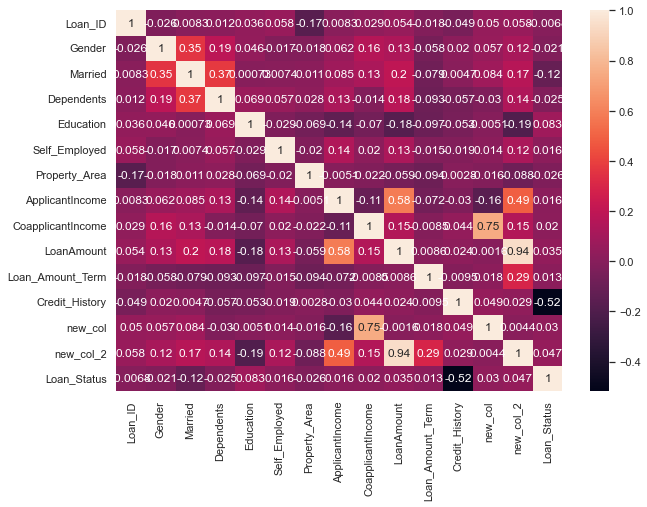

In [105]:
data_corr = pd.concat([x_train, y_train], axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

# new_col 0.03 , new_col_2, 0.047
# not that much , but that will help us reduce the number of features

In [106]:
x_train.drop(['CoapplicantIncome', 'ApplicantIncome', 'Loan_Amount_Term', 'LoanAmount'], axis=1, inplace=True)

In [107]:
train_eval_cross(models,x_train,y_train,skf)

LogisticRegression :
 pre      0.190000
 rec      0.045417
 f1       0.072632
 loss    10.695751
 acc      0.690327
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.282190
 rec      0.149583
 f1       0.193264
 loss    13.580184
 acc      0.606816
Name: 0, dtype: float64
------------------------------
svc :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------


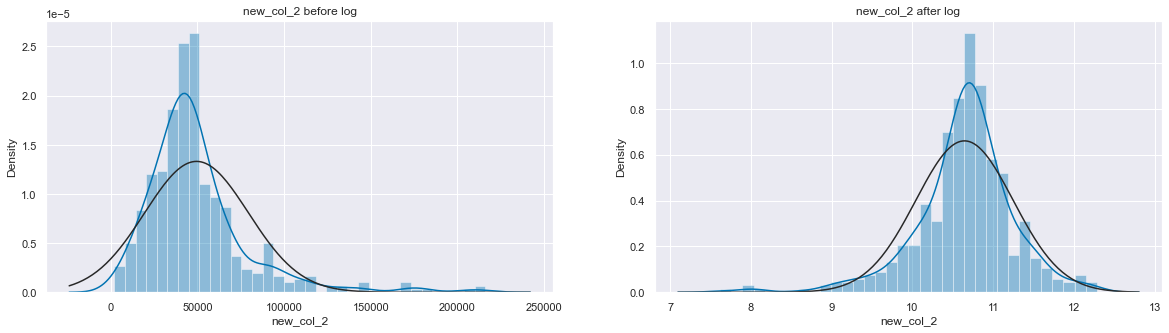

In [108]:
# new_col_2

# we can see we got right_skewed
# we can solve this problem with very simple statistical teqniq , by taking the logarithm of all the values
# because when data is normally distributed that will help improving our model

from scipy.stats import norm

fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(x_train['new_col_2'], ax=ax[0], fit=norm)
ax[0].set_title('new_col_2 before log')

x_train['new_col_2'] = np.log(x_train['new_col_2'])  # logarithm of all the values

sns.distplot(x_train['new_col_2'], ax=ax[1], fit=norm)
ax[1].set_title('new_col_2 after log');

In [109]:
# now we will evaluate our models, and i will do that continuously ,so i don't need to mention that every time

train_eval_cross(models, x_train, y_train, skf)

# wooow our models improved really good by just doing the previous step .


LogisticRegression :
 pre     0.843415
 rec     0.442500
 f1      0.568336
 loss    6.823188
 acc     0.802449
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
 pre      0.314262
 rec      0.143750
 f1       0.188048
 loss    13.153020
 acc      0.619184
Name: 0, dtype: float64
------------------------------
svc :
 pre      0.000000
 rec      0.000000
 f1       0.000000
 loss    10.832488
 acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
 pre     0.856749
 rec     0.435833
 f1      0.564139
 loss    6.823187
 acc     0.802449
Name: 0, dtype: float64
------------------------------
